<a href="https://colab.research.google.com/github/Annisaard/Machine-Learning-homework/blob/main/Week9/week9_chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U mxnet-cu101==1.7.0

     |███████████████████████████████▌| 834.1 MB 1.3 MB/s eta 0:00:10tcmalloc: large alloc 1147494400 bytes == 0x560f17332000 @  0x7f6aa793f615 0x560ede0b64cc 0x560ede19647a 0x560ede0b92ed 0x560ede1aae1d 0x560ede12ce99 0x560ede1279ee 0x560ede0babda 0x560ede12cd00 0x560ede1279ee 0x560ede0babda 0x560ede129737 0x560ede1abc66 0x560ede128daf 0x560ede1abc66 0x560ede128daf 0x560ede1abc66 0x560ede128daf 0x560ede0bb039 0x560ede0fe409 0x560ede0b9c52 0x560ede12cc25 0x560ede1279ee 0x560ede0babda 0x560ede129737 0x560ede1279ee 0x560ede0babda 0x560ede128915 0x560ede0baafa 0x560ede128c0d 0x560ede1279ee
     |████████████████████████████████| 846.0 MB 20 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [2]:
!pip install d2l==0.17.0

     |████████████████████████████████| 83 kB 1.4 MB/s 


In [3]:
%matplotlib inline
from mxnet import autograd, np, npx
from d2l import mxnet as d2l

npx.set_np()

**ReLU Function**

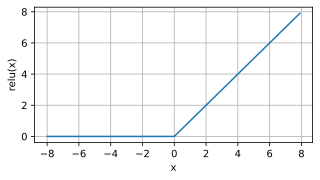

In [4]:
x = np.arange(-8.0, 8.0, 0.1)
x.attach_grad()
with autograd.record():
    y = npx.relu(x)
d2l.plot(x, y, 'x', 'relu(x)', figsize=(5, 2.5))


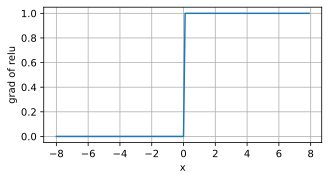

In [5]:
y.backward()
d2l.plot(x, x.grad, 'x', 'grad of relu', figsize=(5, 2.5))


**Sigmoid Function**

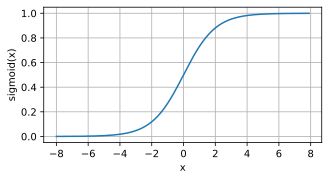

In [6]:
with autograd.record():
    y = npx.sigmoid(x)
d2l.plot(x, y, 'x', 'sigmoid(x)', figsize=(5, 2.5))


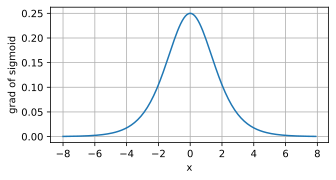

In [7]:
y.backward()
d2l.plot(x, x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))


**Tanh Function**

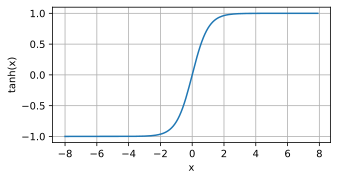

In [8]:
with autograd.record():
    y = np.tanh(x)
d2l.plot(x, y, 'x', 'tanh(x)', figsize=(5, 2.5))


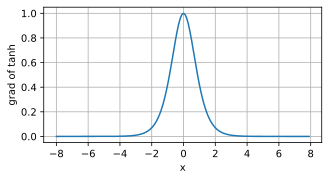

In [9]:
y.backward()
d2l.plot(x, x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))


**Implementation of Multilayer Perceptrons from Scratch (Mxnet)**

In [10]:
from mxnet import gluon, np, npx
from d2l import mxnet as d2l

npx.set_np()

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)


In [11]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = np.random.normal(scale=0.01, size=(num_inputs, num_hiddens))
b1 = np.zeros(num_hiddens)
W2 = np.random.normal(scale=0.01, size=(num_hiddens, num_outputs))
b2 = np.zeros(num_outputs)
params = [W1, b1, W2, b2]

for param in params:
    param.attach_grad()


In [12]:
def relu(X):
    return np.maximum(X, 0)


In [13]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(np.dot(X, W1) + b1)
    return np.dot(H, W2) + b2


In [14]:
loss = gluon.loss.SoftmaxCrossEntropyLoss()


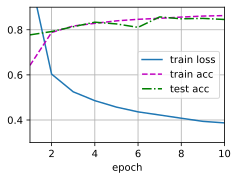

In [15]:
#training
num_epochs, lr = 10, 0.1
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs,
              lambda batch_size: d2l.sgd(params, lr, batch_size))


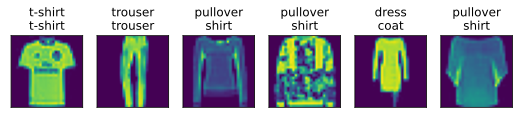

In [16]:
d2l.predict_ch3(net, test_iter)


**Concise Implementation of Multilayer Perceptrons**

In [17]:
from mxnet import gluon, init, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

npx.set_np()


In [18]:
net = nn.Sequential()
net.add(nn.Dense(256, activation='relu'),
        nn.Dense(10))
net.initialize(init.Normal(sigma=0.01))


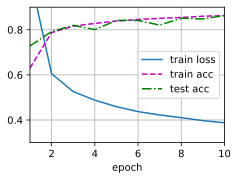

In [19]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = gluon.loss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': lr})

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)


**Model Selection, Underfitting, and Overfitting**

In [20]:
import math
from mxnet import gluon, np, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

npx.set_np()


In [21]:
max_degree = 20  # Maximum degree of the polynomial
n_train, n_test = 100, 100  # Training and test dataset sizes
true_w = np.zeros(max_degree)  # Allocate lots of empty space
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # `gamma(n)` = (n-1)!
# Shape of `labels`: (`n_train` + `n_test`,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)


In [22]:
features[:2], poly_features[:2, :], labels[:2]


(array([[0.28065428],
        [1.3291161 ]]),
 array([[1.0000000e+00, 2.8065428e-01, 3.9383411e-02, 3.6843745e-03,
         2.5850887e-04, 1.4510324e-05, 6.7873077e-07, 2.7212671e-08,
         9.5466912e-10, 2.9770218e-11, 8.3551390e-13, 2.1317322e-14,
         4.9856650e-16, 1.0763449e-17, 2.1577199e-19, 4.0371551e-21,
         7.0815305e-23, 1.1690953e-24, 1.8228423e-26, 2.6925709e-28],
        [1.0000000e+00, 1.3291161e+00, 8.8327479e-01, 3.9132491e-01,
         1.3002907e-01, 3.4564745e-02, 7.6567596e-03, 1.4538176e-03,
         2.4153655e-04, 3.5670011e-05, 4.7409585e-06, 5.7284404e-07,
         6.3448020e-08, 6.4869070e-09, 6.1584660e-10, 5.4568770e-11,
         4.5330146e-12, 3.5440607e-13, 2.6169268e-14, 1.8306311e-15]]),
 array([5.1475654, 5.6400795]))

In [23]:
def evaluate_loss(net, data_iter, loss):  
    """Evaluate the loss of a model on the given dataset."""
    metric = d2l.Accumulator(2)  # Sum of losses, no. of examples
    for X, y in data_iter:
        l = loss(net(X), y)
        metric.add(l.sum(), d2l.size(l))
    return metric[0] / metric[1]


In [24]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = gluon.loss.L2Loss()
    net = nn.Sequential()
    # Switch off the bias since we already catered for it in the polynomial
    # features
    net.add(nn.Dense(1, use_bias=False))
    net.initialize()
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels), batch_size)
    test_iter = d2l.load_array((test_features, test_labels), batch_size,
                               is_train=False)
    trainer = gluon.Trainer(net.collect_params(), 'sgd',
                            {'learning_rate': 0.01})
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data().asnumpy())


weight: [[ 4.968987   1.3038021 -3.3491359  5.3676257]]


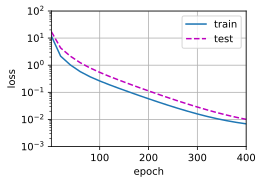

In [25]:
# Pick the first four dimensions, i.e., 1, x, x^2/2!, x^3/3! from the
# polynomial features
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])


weight: [[3.4121475 3.1122265]]


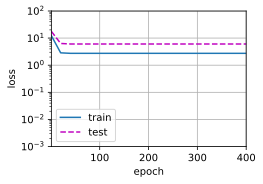

In [26]:
# Pick the first two dimensions, i.e., 1, x, from the polynomial features
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])


weight: [[ 4.9723916   1.2840816  -3.284306    5.141022   -0.39603564  1.4572037
   0.08504172  0.21868548  0.03130135 -0.04631499 -0.04931365  0.04704112
   0.04832514 -0.02605397 -0.00669402 -0.06502485  0.06345494 -0.0622043
  -0.04259906  0.01668593]]


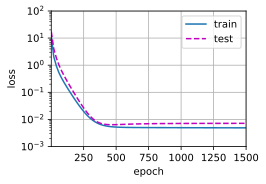

In [27]:
# Pick all the dimensions from the polynomial features
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)
